In [0]:
import os
import math

from IPython import display
from matplotlib import style
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

pd.options.display.float_format = "{:.3f}".format

style.use('ggplot')

os.chdir('/content/drive/ml_directory/recommend_this/juice_recommender/')

In [16]:
my_juice_df = pd.read_csv('juices_modified_dataset.csv')
display.display(my_juice_df.head())

my_juice_df = my_juice_df.reindex(np.random.permutation(my_juice_df.index))
display.display(my_juice_df.head())

,fid,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
0,1,Rock The Beet,0,0,1,fever
1,2,Turmeric Sunrise,0,0,1,fever
2,3,Lemon Drop,0,0,1,fever
3,4,Fennel to the Metal,0,0,1,fever
4,5,Dragon Blood,0,0,1,fever


,fid,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
59,60,Carrot,0,1,1,soarthroat_fever
63,64,Lemon Honey And Garlic,0,1,1,soarthroat_fever
56,57,Matzo Ball,1,0,0,cold
62,63,Curry Green Leaf,1,0,1,cold_fever
7,8,Creamsicle,0,0,1,fever


In [17]:
def category_conversion(df, series_name):
    return pd.to_numeric(pd.Categorical(df[series_name]).codes)


my_juice_df['disease_curing'] = category_conversion(my_juice_df,
                                                    "disease_curing")
display.display(my_juice_df.head())

### explicitly convert datatype of "disease_curing" column
my_juice_df['disease_curing'] = my_juice_df.disease_curing.astype('int32')
display.display(my_juice_df.head())

,fid,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
59,60,Carrot,0,1,1,6
63,64,Lemon Honey And Garlic,0,1,1,6
56,57,Matzo Ball,1,0,0,0
62,63,Curry Green Leaf,1,0,1,1
7,8,Creamsicle,0,0,1,4


,fid,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
59,60,Carrot,0,1,1,6
63,64,Lemon Honey And Garlic,0,1,1,6
56,57,Matzo Ball,1,0,0,0
62,63,Curry Green Leaf,1,0,1,1
7,8,Creamsicle,0,0,1,4


,fid,disease_cold,disease_soarthroat,disease_fever,disease_curing
count,66.000,66.000,66.000,66.000,66.000
mean,33.500,0.515,0.409,0.379,2.652
std,19.196,0.504,0.495,0.489,2.101
min,1.000,0.000,0.000,0.000,0.000
25%,17.250,0.000,0.000,0.000,0.000
50%,33.500,1.000,0.000,0.000,3.000
75%,49.750,1.000,1.000,1.000,4.000
max,66.000,1.000,1.000,1.000,6.000


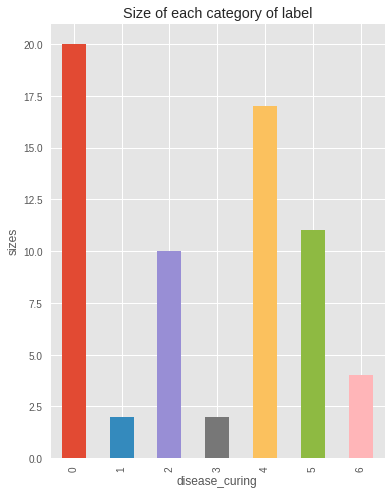

In [18]:
display.display(my_juice_df.describe())

### sizes of different labels
my_juice_df.groupby('disease_curing').size().plot(
    figsize=(6, 8), kind='bar', title="Size of each category of label")
plt.ylabel("sizes")
plt.show()

In [0]:
def preprocess_features(dataframe):
    features = [
        "juice_name", "disease_cold", "disease_soarthroat", "disease_fever",
        "disease_curing"
    ]
    selected_features = dataframe[features]
    processed_features = selected_features.copy()
    return processed_features


def preprocess_targets(dataframe):
    output_targets = pd.DataFrame()
    output_targets["disease_curing"] = dataframe["disease_curing"]
    return output_targets

In [20]:
training_examples = preprocess_features(my_juice_df[0:50])
training_targets = preprocess_targets(my_juice_df[0:50])
display.display(training_examples.head())
display.display(training_targets.head())

validation_examples = preprocess_features(my_juice_df[50:66])
validation_targets = preprocess_targets(my_juice_df[50:66])
display.display(validation_examples.head())
display.display(validation_targets.head())

,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
59,Carrot,0,1,1,6
63,Lemon Honey And Garlic,0,1,1,6
56,Matzo Ball,1,0,0,0
62,Curry Green Leaf,1,0,1,1
7,Creamsicle,0,0,1,4


,disease_curing
59,6
63,6
56,0
62,1
7,4


,juice_name,disease_cold,disease_soarthroat,disease_fever,disease_curing
35,Garlic,0,1,0,5
3,Fennel to the Metal,0,0,1,4
4,Dragon Blood,0,0,1,4
1,Turmeric Sunrise,0,0,1,4
22,Watermelon,1,0,0,0


,disease_curing
35,5
3,4
4,4
1,4
22,0
